In [1]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *

plt.style.use('default')


import pickle
RESULT_DIR = "../../ExptsPaper"
# os.mkdir(RESULT_DIR)
from timeit import default_timer
from sklearn.datasets import make_blobs

from tqdm.notebook import tqdm


In [2]:
def Blobs_Anisotropic(N,D,K,box, seed, ratio=4, axis_aligned=True):
    # generate anisotropic blobs/clusters (non-isotropic gaussians)
  
    generator = np.random.RandomState(seed)
    center_box = [0,box]

    centers = np.array(generator.uniform(center_box[0], center_box[1], size=(K, D)))
    
    #######################################################################
    cov = np.zeros((D,D))
    
    if axis_aligned:
        
        np.fill_diagonal(cov, 1)
        #cov = np.diag(np.diag(cov))
    else:
       cov = np.array(generator.uniform(-center_box[1]/10, center_box[1]/10, size=(D, D)))
        #print(cov)

        np.fill_diagonal(cov, 1)
        # to create a symmetric semi-definite matrix

        cov = np.dot(cov.T, cov)  


    split = D // 2 # 2nd half of dims (diags, or bottom right of cov matrix) 
    # changes so that the variance ratio is 4 and stdev ratio is 2    
    for i in range(split, D):
        cov[i,i] = ratio
    #print(cov)
    

    
    X = np.empty((1,D))
    y = []

    parts = [N // K for k in range(K-1) ]
    parts.append(N - sum(parts))

    ## use a for loop K times to generate K blobs...
    for k in range(K):
        #print(centers[k])
        X = np.vstack( (X, np.random.multivariate_normal(centers[k], cov, (parts[k]))) )
        y.extend([k for i in range(parts[k])])

    X = X[1::, :]

    cols = [ 'X' + str(i+1) for i in range(D) ]
    df_data = pd.DataFrame(X, columns = cols)

        
    return df_data, X, y
    

## k = 5, 5, 5;  d = 5, 5, 5, 



## kc-Opt

In [5]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K = 5
D_list = [5,10,15] 

box = 500
seed = 65

tol_list = [0.08,0.15,0.15]
initCons_list = 5
cnt = 0

for i, D in enumerate(tqdm(D_list)):
    optgap_list=[]

    time_list = []
    metrics_list = []

    # obj_list = []
    constrsCnt_list = []

    epsVal_list = []
    optVal_list = []

    centers_list = []
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs_Anisotropic(N,D,K,box, seed)

        clus = UnsupervisedClustering(K =K , max_iter= 100, random_state=0)
        clus.set_model(MinMax(initConstrCnt=initCons_list, optimalGap= 0.05, tol = tol_list[i], time = 60))

        start = default_timer()
        clus.fit(df_data )

        end = default_timer()
        metrics_list.append(clus.evaluate(y))
        # print(metrics_list[-1])
        time_list.append(end-start)

        constrsCnt_list.append(len(clus.constr_gen_pts))
        optgap_list.append(clus.model_optGap)

        epsVal_list.append(clus.epsVal)
        optVal_list.append(clus.model_optVal)

        centers_list.append(clus.cluster_centers)

        # obj_list.append(clus)

        cnt+=1

        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)




    with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_MM.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(optVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)



  0%|          | 0/3 [00:00<?, ?it/s]




Starting N = 1000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-08
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  13.229136148287125
E:  13.229136148287168
E:  13.22913614828721


E:  13.229136148287125
Optimal solution reached with Cost:  13.229136148287125


# of constraints added:  45
Finished running N = 1000 K = 5 and D = 5
****************************************************************************************************



Starting N = 3150 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  13.330344284827476
E:  13.330344284827476
E:  13.33034428482756
E:  13.330344284827447


E:  13.400227182984736
Optimal solution reached with Cost:  13.400227182984736


# of constraints added:  49
Finished running N = 3150 K = 5 and D = 5
****************************************************************************************************



Starting N = 10000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  15.149901175394746
E:  15.149901175394803
E:  15.149901175394803
E:  15.590894579617876
E:  15.590894577577602
E:  15.590894579617895
Optimal solution reached with Cost:  15.590894579617895




# of constraints added:  48
Finished running N = 10000 K = 5 and D = 5
****************************************************************************************************



Starting N = 31500 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  15.312154818182535
E:  16.049355119844904
E:  16.049355119844904
E:  16.04935511984479
E:  16.04935511984479
E:  16.04935511984479
E:  16.049355119844904
Optimal solution reached with Cost:  16.049355119844904




# of constraints added:  52
Finished running N = 31500 K = 5 and D = 5
****************************************************************************************************



Starting N = 100000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  17.768257550688084
E:  17.768257550688077
E:  17.768257550688077
E:  17.768257550688077
E:  17.768257550688077
E:  17.76825755068805
Optimal solution reached with Cost:  17.76825755068805




# of constraints added:  48
Finished running N = 100000 K = 5 and D = 5
****************************************************************************************************





Starting N = 315000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  17.43473061809999
E:  17.685143562979846
E:  17.902395128473955
E:  17.90239512847394
E:  17.902395128473962
E:  17.902395128473955
Optimal solution reached with Cost:  17.902395128473955


# of constraints added:  48


Finished running N = 315000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  18.51519447918122
E:  18.745143232940364
E:  18.745143232940393
E:  18.745143232940336
E:  18.745143232940336
E:  18.745143232940336
Optimal solution reached with Cost:  18.745143232940336


# of constraints added:  50


 33%|███▎      | 1/3 [02:37<05:15, 157.88s/it]

Finished running N = 1000000 K = 5 and D = 5
****************************************************************************************************





Starting N = 1000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  20.011126586729915
E:  20.011126586729844
E:  20.011126586729855
E:  20.01112658672985
E:  20.011126586729894
E:  20.011126586729887
E:  20.01112658672986
E:  20.011126586729915


E:  20.011126586729898
Optimal solution reached with Cost:  20.011126586729898


# of constraints added:  65
Finished running N = 1000 K = 5 and D = 10
****************************************************************************************************



Starting N = 3150 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  21.538600660856883
E:  21.5386006608569
E:  21.5386006608569
E:  21.6905527003411
E:  21.690552700341073
E:  21.6905527003411
E:  21.690552700341016
E:  21.690552700341186
E:  21.690552700341073
E:  21.6905527003411
E:  21.690552700341073
E:  21.690552700341186
E:  21.69055270034096
E:  21.690552700341073
E:  21.690552700341073
E:  21.690552700341044
E:  21.690552700341073
E:  21.690552700341016
E:  21.690552700340987
Optimal solution reached with Cost:  21.690552700340987




# of constraints added:  86
Finished running N = 3150 K = 5 and D = 10
****************************************************************************************************



Starting N = 10000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  20.941099262030775
E:  22.147891161689813
E:  22.550070538990866
E:  22.550070538990923
E:  22.63798223679686
E:  22.657810973480537
E:  22.65781097348082
E:  22.65781097348031
E:  22.657810973480593
E:  22.657810973480935
E:  22.657810973480935
E:  22.657810973480593
E:  22.657810973480764
E:  22.657810973480593
Optimal solution reached with Cost:  22.657810973480593




# of constraints added:  78
Finished running N = 10000 K = 5 and D = 10
****************************************************************************************************



Starting N = 31500 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  23.601235041504168
E:  23.430263907236014
E:  23.47145498274574
E:  23.836850733657002
E:  24.026702952239617
E:  24.07101906052074
E:  24.0577825866838
E:  24.103274103746628
E:  24.103274103746514
E:  24.103274103746458
E:  24.10327410374674
E:  24.10327410374657
E:  24.103274103746628
E:  24.103274103746543
E:  24.10327410374657
Optimal solution reached with Cost:  24.10327410374657




# of constraints added:  83
Finished running N = 31500 K = 5 and D = 10
****************************************************************************************************



Starting N = 100000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  25.277690518787153
E:  25.277690518787182
E:  25.048308301851307
E:  24.63316802287943
E:  25.07499195460946
E:  25.134817157672074
E:  25.134817157672117
E:  25.134817157672103
E:  25.143339323978807
Optimal solution reached with Cost:  25.143339323978807


# of constraints added:  71


Finished running N = 100000 K = 5 and D = 10
****************************************************************************************************



Starting N = 315000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  25.06369916879413
E:  26.637687899665366
E:  26.637687899665366
E:  26.63768789966548
E:  26.637687899665366
E:  26.637687899665366
E:  26.637687899665252
E:  26.637687899665366
E:  26.637687899665224
E:  26.637687899665593
E:  26.63768789966531
E:  26.637687899665167
E:  26.637687899665366
E:  26.637687899665167
E:  26.637687899665195
E:  26.637687899665167
E:  26.637687899665167
E:  26.637687899665252
E:  26.637687899665366
E:  26.637687899665252
E:  26.63768789966514
E:  26.637687899665252
E:  26.637687899665366
E:  26.63768789966531
E:  26.63768789966531
E:  26.637687899665167
E:  26.63768789966511
E:  26.63768789966531
E:  26.637687899665366
Optimal solution reached with Cost:  26.637687899

Finished running N = 315000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  26.07694542447433
E:  27.776281548883333
E:  27.77628154888339
E:  27.940163933104316
E:  27.940163933104202
E:  28.15066254921885
E:  28.214606631265724
E:  28.25572787354386
E:  28.255727873544004
E:  28.30209896496399
E:  28.302098964963875
E:  28.30209896496376
E:  28.302098964963875
E:  28.302098964963648
E:  28.302098964963875
E:  28.302098964963818
E:  28.30209896496399
E:  28.302098964964102
E:  28.30209896496376
E:  28.30209896496389
Optimal solution reached with Cost:  28.30209896496389


# of constraints added:  103


 67%|██████▋   | 2/3 [08:09<04:20, 260.15s/it]

Finished running N = 1000000 K = 5 and D = 10
****************************************************************************************************





Starting N = 1000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  24.59378011899514
E:  25.973530533098085
E:  25.973530533098085
E:  26.101138935199874
E:  26.16248086238943
E:  26.162480862389145
E:  26.20226934164708
E:  26.264701961034177
E:  26.264701961034348
E:  26.26685020358292
E:  26.26685020358275
E:  26.26685020358252
E:  26.266850203582692
E:  26.26685020358275
E:  26.266850203582408
E:  26.26685020358252
E:  26.26685020358275
E:  26.266850203582635


E:  26.26685020358275
Optimal solution reached with Cost:  26.26685020358275


# of constraints added:  99
Finished running N = 1000 K = 5 and D = 15
****************************************************************************************************



Starting N = 3150 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  28.535364338915283
E:  29.183308945075595
E:  29.447481973142644
E:  29.4992792803165
E:  29.70994922711924
E:  29.91895245839811
E:  29.918952458398195
E:  29.918952458398053
E:  29.918952458398053
E:  29.91895245839804
E:  29.918952458398223
E:  29.91895245839808
E:  29.91895245839811
E:  29.918952458398053
E:  29.918952458397996
E:  29.918952458398167
E:  29.918952458398167
E:  29.918952458398195
E:  29.918952458398053
E:  29.918952458398053


E:  29.918952458397996
Optimal solution reached with Cost:  29.918952458397996


# of constraints added:  108
Finished running N = 3150 K = 5 and D = 15
****************************************************************************************************





Starting N = 10000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  28.69546152496406
E:  30.256887132712336
E:  30.25688713271235
E:  30.256887132712336
E:  30.256887132712336
E:  30.256887132712336
E:  30.256887132712322
E:  30.256887132712336
E:  30.25688713271228
E:  30.256887132712308
E:  30.256887132712336
E:  30.256887132712336
E:  30.256887132712308
E:  30.25688713271225
E:  30.256887132712322
E:  30.256887132712393
E:  30.256887132712478
E:  30.25688713271228
E:  30.256887132712336
E:  30.256887132712222
E:  30.256887132712308
E:  30.256887132712308
E:  30.25688713271228
E:  30.256887132712336
E:  30.256887132712308
E:  30.256887132712336
E:  30.25688713271245
E:  30.256887132712308
E:  30.256887132712336
Optimal solution reached with Cost:  30.256887132712336




# of constraints added:  130
Finished running N = 10000 K = 5 and D = 15
****************************************************************************************************



Starting N = 31500 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  29.380798724097858
E:  31.25197276664386
E:  32.00912950016584
E:  32.22617899544309
E:  32.32300950521352
E:  32.32300950521358
E:  32.32300950521358
E:  32.32300950521335
E:  32.32300950521335
E:  32.323009505213506
E:  32.323009505213605
E:  32.32300950521346
E:  32.32300950521335
E:  32.32300950521358
E:  32.32300950521349
E:  32.32300950521346
E:  32.32300950521346
E:  32.32300950521346
E:  32.32300950521358
E:  32.323009505213406
E:  32.32300950521346
E:  32.32300950521349
E:  32.32300950521352
E:  32.32300950521355
E:  32.32300950521358
E:  32.32300950521349
E:  32.32300950521355
E:  32.32300950521355
E:  32.32300950521346
E:  32.32300950521346
Optimal solutio



# of constraints added:  133
Finished running N = 31500 K = 5 and D = 15
****************************************************************************************************



Starting N = 100000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  32.9408567539179
E:  32.94085675391793
E:  33.88538789369744
E:  33.93332858717005
E:  34.13767402505198
E:  34.453529520435836
E:  34.45352952043578
E:  34.453529520435666
E:  34.453529520435666
E:  34.45352952043578
E:  34.45352952043572
E:  34.453529520435666
E:  34.45352952043572
E:  34.453529520435836
E:  34.45352952043595
E:  34.45352952043578
E:  34.453529520435836
E:  34.453529520435865
E:  34.45352952043572
E:  34.45352952043595
E:  34.45352952043595
E:  34.45352952043555
E:  34.45352952043589
E:  34.45352952043595
E:  34.45352952043595
Optimal solution reached with Cost:  34.45352952043595




# of constraints added:  123
Finished running N = 100000 K = 5 and D = 15
****************************************************************************************************



Starting N = 315000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  33.54662693432567
E:  34.15645382043874
E:  34.15645382043874
E:  34.51309215612206
E:  34.709271311427926
E:  34.88465196440001
E:  35.18334368942834
E:  35.18334368942831
E:  35.230782820380625
E:  35.247242180680814
E:  35.24724218068093
E:  35.247242180680786
E:  35.24724218068056
E:  35.24724218068047
E:  35.24724218068127
E:  35.2472421806807
E:  35.247242180680644
E:  35.247242180680416
E:  35.2472421806808
E:  35.247242180680814
E:  35.247242180680814
E:  35.24724218068059
E:  35.24724218068093
E:  35.247242180680644
E:  35.24724218068047
E:  35.24724218068053
E:  35.24724218068059
Optimal solution reached with Cost:  35.24724218068059


# of constraints ad

Finished running N = 315000 K = 5 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  36.94235102013027
E:  36.942351020130275
E:  36.942351020130275
E:  36.98694630418244
E:  36.98694630418251
E:  36.990324895208346
E:  37.05376489694011
E:  37.05376489694004
E:  37.068443941726855
E:  37.08763541303455
E:  37.20285965960488
E:  37.24601461255321
E:  37.2460146125531
E:  37.25707215457112
E:  37.25707215457135
E:  37.25707215457135
E:  37.257072154571006
E:  37.257072154571176
E:  37.25707215457112
E:  37.25707215457129
E:  37.257072154571176
E:  37.25707215457123
E:  37.257072154571176
E:  37.257072154571176
E:  37.25707215457123
E:  37.25707215457123
E:  37.25707215457123
E:  37.257072154571176
E:  37.25707215457106
E:  37.257072154571176
Optimal solution reached with Cost:  

100%|██████████| 3/3 [13:10<00:00, 263.66s/it]

Finished running N = 1000000 K = 5 and D = 15
****************************************************************************************************


## KCenters Gonzalez 

In [21]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]
# N_list = [1000,3150]
K_list = [5, 5,5,]# 10,10, 15]
D_list = [5,10,15, ]#10,15, 15] 

box = 500
seed = 65

for i, D in enumerate(tqdm(D_list)):


    time_list = []
    metrics_list = []
    epsVal_list = []

    centers_list = []

    obj_list = []


    K = K_list[i]
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs_Anisotropic(N,D,K,box, seed)
       
        kc_Gon = UnsupervisedClustering(K =K)
        kc_Gon.set_model(KCenters_Gon())

        start = default_timer()
        kc_Gon.fit(df_data )

        end = default_timer()
        metrics_list.append(kc_Gon.evaluate(y))
        epsVal_list.append(kc_Gon.epsVal)
        centers_list.append(kc_Gon.cluster_centers)
    
        time_list.append(end - start)

        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)



    with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_KC_Gon.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/3 [00:00<?, ?it/s]




Starting N = 1000 K = 5 and D = 5
Finished running N = 1000 K = 5 and D = 5
****************************************************************************************************



Starting N = 3150 K = 5 and D = 5


Finished running N = 3150 K = 5 and D = 5
****************************************************************************************************



Starting N = 10000 K = 5 and D = 5


Finished running N = 10000 K = 5 and D = 5
****************************************************************************************************



Starting N = 31500 K = 5 and D = 5


Finished running N = 31500 K = 5 and D = 5
****************************************************************************************************



Starting N = 100000 K = 5 and D = 5


Finished running N = 100000 K = 5 and D = 5
****************************************************************************************************



Starting N = 315000 K = 5 and D = 5


Finished running N = 315000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 5


 33%|███▎      | 1/3 [01:23<02:47, 83.98s/it]

Finished running N = 1000000 K = 5 and D = 5
****************************************************************************************************





Starting N = 1000 K = 5 and D = 10
Finished running N = 1000 K = 5 and D = 10
****************************************************************************************************



Starting N = 3150 K = 5 and D = 10


Finished running N = 3150 K = 5 and D = 10
****************************************************************************************************



Starting N = 10000 K = 5 and D = 10


Finished running N = 10000 K = 5 and D = 10
****************************************************************************************************



Starting N = 31500 K = 5 and D = 10


Finished running N = 31500 K = 5 and D = 10
****************************************************************************************************



Starting N = 100000 K = 5 and D = 10


Finished running N = 100000 K = 5 and D = 10
****************************************************************************************************



Starting N = 315000 K = 5 and D = 10


Finished running N = 315000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 10


 67%|██████▋   | 2/3 [02:56<01:28, 88.72s/it]

Finished running N = 1000000 K = 5 and D = 10
****************************************************************************************************





Starting N = 1000 K = 5 and D = 15
Finished running N = 1000 K = 5 and D = 15
****************************************************************************************************



Starting N = 3150 K = 5 and D = 15


Finished running N = 3150 K = 5 and D = 15
****************************************************************************************************



Starting N = 10000 K = 5 and D = 15


Finished running N = 10000 K = 5 and D = 15
****************************************************************************************************



Starting N = 31500 K = 5 and D = 15


Finished running N = 31500 K = 5 and D = 15
****************************************************************************************************



Starting N = 100000 K = 5 and D = 15


Finished running N = 100000 K = 5 and D = 15
****************************************************************************************************



Starting N = 315000 K = 5 and D = 15


Finished running N = 315000 K = 5 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 15


100%|██████████| 3/3 [04:20<00:00, 86.74s/it]

Finished running N = 1000000 K = 5 and D = 15
****************************************************************************************************


## KCenters Gonzalez - Average 

In [22]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]
K_list = [5, 5,5,]# 10,10, 15]
D_list = [5,10,15, ]#10,15, 15] 

box = 500
seed = 65

cnt = 0

for i, D in enumerate(tqdm(D_list)):


    time_list = []
    metrics_list = []
    epsVal_list = []

    centers_list = []

    obj_list = []


    K = K_list[i]
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs_Anisotropic(N,D,K,box, seed)

        metrics_list_inner = []
        time_list_inner = []
        epsVal_list_inner = []
        centers_list_inner = []

        for j in range(10):
            
            kc_Gon = UnsupervisedClustering(K =K)
            kc_Gon.set_model(KCenters_Gon())

            start = default_timer()
            kc_Gon.fit(df_data )

            end = default_timer()

            metrics_list_inner.append(kc_Gon.evaluate(y))
            epsVal_list_inner.append(kc_Gon.epsVal)
            centers_list_inner.append(kc_Gon.cluster_centers)
        
            time_list_inner.append(end - start)

        
        time_list.append(np.average(time_list_inner))
        metrics_list.append(np.average(metrics_list_inner,axis=0))
        epsVal_list.append(np.average(epsVal_list_inner))
        centers_list.append(centers_list_inner)


        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)



    with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_KC_GonAvg.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/3 [00:00<?, ?it/s]




Starting N = 1000 K = 5 and D = 5


Finished running N = 1000 K = 5 and D = 5
****************************************************************************************************



Starting N = 3150 K = 5 and D = 5


Finished running N = 3150 K = 5 and D = 5
****************************************************************************************************



Starting N = 10000 K = 5 and D = 5


Finished running N = 10000 K = 5 and D = 5
****************************************************************************************************



Starting N = 31500 K = 5 and D = 5


Finished running N = 31500 K = 5 and D = 5
****************************************************************************************************



Starting N = 100000 K = 5 and D = 5


Finished running N = 100000 K = 5 and D = 5
****************************************************************************************************



Starting N = 315000 K = 5 and D = 5


Finished running N = 315000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 5


 33%|███▎      | 1/3 [14:31<29:02, 871.43s/it]

Finished running N = 1000000 K = 5 and D = 5
****************************************************************************************************





Starting N = 1000 K = 5 and D = 10


Finished running N = 1000 K = 5 and D = 10
****************************************************************************************************



Starting N = 3150 K = 5 and D = 10


Finished running N = 3150 K = 5 and D = 10
****************************************************************************************************



Starting N = 10000 K = 5 and D = 10


Finished running N = 10000 K = 5 and D = 10
****************************************************************************************************



Starting N = 31500 K = 5 and D = 10


Finished running N = 31500 K = 5 and D = 10
****************************************************************************************************



Starting N = 100000 K = 5 and D = 10


Finished running N = 100000 K = 5 and D = 10
****************************************************************************************************



Starting N = 315000 K = 5 and D = 10


Finished running N = 315000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 10


 67%|██████▋   | 2/3 [28:24<14:09, 849.02s/it]

Finished running N = 1000000 K = 5 and D = 10
****************************************************************************************************





Starting N = 1000 K = 5 and D = 15


Finished running N = 1000 K = 5 and D = 15
****************************************************************************************************



Starting N = 3150 K = 5 and D = 15


Finished running N = 3150 K = 5 and D = 15
****************************************************************************************************



Starting N = 10000 K = 5 and D = 15


Finished running N = 10000 K = 5 and D = 15
****************************************************************************************************



Starting N = 31500 K = 5 and D = 15


Finished running N = 31500 K = 5 and D = 15
****************************************************************************************************



Starting N = 100000 K = 5 and D = 15


Finished running N = 100000 K = 5 and D = 15
****************************************************************************************************



Starting N = 315000 K = 5 and D = 15


Finished running N = 315000 K = 5 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 15


100%|██████████| 3/3 [42:05<00:00, 841.71s/it]

Finished running N = 1000000 K = 5 and D = 15
****************************************************************************************************


## KCenters HS

In [23]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]
K_list = [5, 5,5,]# 10,10, 15]
D_list = [5,10,15, ]#10,15, 15] 

box = 500
seed = 65

for i, D in enumerate(tqdm(D_list)):


    time_list = []
    metrics_list = []
    epsVal_list = []

    centers_list = []

    obj_list = []


    K = K_list[i]
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs_Anisotropic(N,D,K,box, seed)
       
        kc_HS = UnsupervisedClustering(K =K)
        kc_HS.set_model(KCenter_HS())

        start = default_timer()
        kc_HS.fit(df_data )

        end = default_timer()
        metrics_list.append(kc_HS.evaluate(y))
        epsVal_list.append(kc_HS.epsVal)
        centers_list.append(kc_HS.cluster_centers)
    
        time_list.append(end - start)

        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)



    with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_KC_HS.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/3 [00:00<?, ?it/s]




Starting N = 1000 K = 5 and D = 5


Finished running N = 1000 K = 5 and D = 5
****************************************************************************************************



Starting N = 3150 K = 5 and D = 5


Finished running N = 3150 K = 5 and D = 5
****************************************************************************************************



Starting N = 10000 K = 5 and D = 5


Finished running N = 10000 K = 5 and D = 5
****************************************************************************************************



Starting N = 31500 K = 5 and D = 5


Finished running N = 31500 K = 5 and D = 5
****************************************************************************************************



Starting N = 100000 K = 5 and D = 5


Finished running N = 100000 K = 5 and D = 5
****************************************************************************************************



Starting N = 315000 K = 5 and D = 5


Finished running N = 315000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 5


 33%|███▎      | 1/3 [02:11<04:22, 131.21s/it]

Finished running N = 1000000 K = 5 and D = 5
****************************************************************************************************





Starting N = 1000 K = 5 and D = 10
Finished running N = 1000 K = 5 and D = 10
****************************************************************************************************



Starting N = 3150 K = 5 and D = 10


Finished running N = 3150 K = 5 and D = 10
****************************************************************************************************



Starting N = 10000 K = 5 and D = 10


Finished running N = 10000 K = 5 and D = 10
****************************************************************************************************



Starting N = 31500 K = 5 and D = 10


Finished running N = 31500 K = 5 and D = 10
****************************************************************************************************



Starting N = 100000 K = 5 and D = 10


Finished running N = 100000 K = 5 and D = 10
****************************************************************************************************



Starting N = 315000 K = 5 and D = 10


Finished running N = 315000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 10


 67%|██████▋   | 2/3 [04:23<02:11, 131.94s/it]

Finished running N = 1000000 K = 5 and D = 10
****************************************************************************************************





Starting N = 1000 K = 5 and D = 15
Finished running N = 1000 K = 5 and D = 15
****************************************************************************************************





Starting N = 3150 K = 5 and D = 15


Finished running N = 3150 K = 5 and D = 15
****************************************************************************************************



Starting N = 10000 K = 5 and D = 15


Finished running N = 10000 K = 5 and D = 15
****************************************************************************************************



Starting N = 31500 K = 5 and D = 15


Finished running N = 31500 K = 5 and D = 15
****************************************************************************************************



Starting N = 100000 K = 5 and D = 15


Finished running N = 100000 K = 5 and D = 15
****************************************************************************************************



Starting N = 315000 K = 5 and D = 15


Finished running N = 315000 K = 5 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 15


100%|██████████| 3/3 [06:37<00:00, 132.62s/it]

Finished running N = 1000000 K = 5 and D = 15
****************************************************************************************************


## KCenters HS - Average

In [24]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K_list = [5, 5,5,]# 10,10, 15]
D_list = [5,10,15, ]#10,15, 15] 

box = 500
seed = 65

cnt = 0

for i, D in enumerate(tqdm(D_list)):


    time_list = []
    metrics_list = []
    epsVal_list = []

    centers_list = []

    obj_list = []


    K = K_list[i]
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs_Anisotropic(N,D,K,box, seed)

        metrics_list_inner = []
        time_list_inner = []
        epsVal_list_inner = []
        centers_list_inner = []

        for j in range(10):
            
            kc_HS = UnsupervisedClustering(K =K)
            kc_HS.set_model(KCenter_HS())

            start = default_timer()
            kc_HS.fit(df_data )

            end = default_timer()

            metrics_list_inner.append(kc_HS.evaluate(y))
            epsVal_list_inner.append(kc_HS.epsVal)
            centers_list_inner.append(kc_HS.cluster_centers)
        
            time_list_inner.append(end - start)

        
        time_list.append(np.average(time_list_inner))
        metrics_list.append(np.average(metrics_list_inner,axis=0))
        epsVal_list.append(np.average(epsVal_list_inner))
        centers_list.append(centers_list_inner)


        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)



    with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_KC_HSAvg.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/3 [00:00<?, ?it/s]




Starting N = 1000 K = 5 and D = 5


Finished running N = 1000 K = 5 and D = 5
****************************************************************************************************



Starting N = 3150 K = 5 and D = 5


Finished running N = 3150 K = 5 and D = 5
****************************************************************************************************



Starting N = 10000 K = 5 and D = 5


Finished running N = 10000 K = 5 and D = 5
****************************************************************************************************



Starting N = 31500 K = 5 and D = 5


Finished running N = 31500 K = 5 and D = 5
****************************************************************************************************



Starting N = 100000 K = 5 and D = 5


Finished running N = 100000 K = 5 and D = 5
****************************************************************************************************



Starting N = 315000 K = 5 and D = 5


Finished running N = 315000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 5


 33%|███▎      | 1/3 [21:48<43:37, 1308.71s/it]

Finished running N = 1000000 K = 5 and D = 5
****************************************************************************************************





Starting N = 1000 K = 5 and D = 10


Finished running N = 1000 K = 5 and D = 10
****************************************************************************************************



Starting N = 3150 K = 5 and D = 10


Finished running N = 3150 K = 5 and D = 10
****************************************************************************************************



Starting N = 10000 K = 5 and D = 10


Finished running N = 10000 K = 5 and D = 10
****************************************************************************************************



Starting N = 31500 K = 5 and D = 10


Finished running N = 31500 K = 5 and D = 10
****************************************************************************************************



Starting N = 100000 K = 5 and D = 10


Finished running N = 100000 K = 5 and D = 10
****************************************************************************************************



Starting N = 315000 K = 5 and D = 10


Finished running N = 315000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 10


 67%|██████▋   | 2/3 [43:50<21:56, 1316.40s/it]

Finished running N = 1000000 K = 5 and D = 10
****************************************************************************************************





Starting N = 1000 K = 5 and D = 15


Finished running N = 1000 K = 5 and D = 15
****************************************************************************************************



Starting N = 3150 K = 5 and D = 15


Finished running N = 3150 K = 5 and D = 15
****************************************************************************************************



Starting N = 10000 K = 5 and D = 15


Finished running N = 10000 K = 5 and D = 15
****************************************************************************************************



Starting N = 31500 K = 5 and D = 15


Finished running N = 31500 K = 5 and D = 15
****************************************************************************************************



Starting N = 100000 K = 5 and D = 15


Finished running N = 100000 K = 5 and D = 15
****************************************************************************************************



Starting N = 315000 K = 5 and D = 15


Finished running N = 315000 K = 5 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 15


100%|██████████| 3/3 [1:06:07<00:00, 1322.51s/it]

Finished running N = 1000000 K = 5 and D = 15
****************************************************************************************************


## K Median with random init

In [25]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K_list = [5, 5,5, ] #10,10, 15]
D_list = [5,10,15] # 10,15, 15] 

box = 500
seed = 65

cnt = 0

for i, D in enumerate(tqdm(D_list)):


    time_list = []
    metrics_list = []
    epsVal_list = []

    centers_list = []

    obj_list = []


    K = K_list[i]
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs_Anisotropic(N,D,K,box, seed)

        metrics_list_inner = []
        time_list_inner = []
        epsVal_list_inner = []
        centers_list_inner = []

        for j in range(10):
            
            km = UnsupervisedClustering(K =K, max_iter=50)
            km.set_model(KMedian())

            start = default_timer()
            km.fit(df_data )

            end = default_timer()

            metrics_list_inner.append(km.evaluate(y))
            epsVal_list_inner.append(km.epsVal)
            centers_list_inner.append(km.cluster_centers)
        
            time_list_inner.append(end - start)

        
        time_list.append(np.average(time_list_inner))
        metrics_list.append(np.average(metrics_list_inner,axis=0))
        epsVal_list.append(np.average(epsVal_list_inner))
        centers_list.append(centers_list_inner)


        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)



    with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_KM_Avg.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/3 [00:00<?, ?it/s]




Starting N = 1000 K = 5 and D = 5


Finished running N = 1000 K = 5 and D = 5
****************************************************************************************************



Starting N = 3150 K = 5 and D = 5


Finished running N = 3150 K = 5 and D = 5
****************************************************************************************************



Starting N = 10000 K = 5 and D = 5


Finished running N = 10000 K = 5 and D = 5
****************************************************************************************************



Starting N = 31500 K = 5 and D = 5


Finished running N = 31500 K = 5 and D = 5
****************************************************************************************************



Starting N = 100000 K = 5 and D = 5


Finished running N = 100000 K = 5 and D = 5
****************************************************************************************************



Starting N = 315000 K = 5 and D = 5


Finished running N = 315000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 5


 33%|███▎      | 1/3 [07:36<15:13, 456.76s/it]

Finished running N = 1000000 K = 5 and D = 5
****************************************************************************************************





Starting N = 1000 K = 5 and D = 10


Finished running N = 1000 K = 5 and D = 10
****************************************************************************************************



Starting N = 3150 K = 5 and D = 10


Finished running N = 3150 K = 5 and D = 10
****************************************************************************************************



Starting N = 10000 K = 5 and D = 10


Finished running N = 10000 K = 5 and D = 10
****************************************************************************************************



Starting N = 31500 K = 5 and D = 10


Finished running N = 31500 K = 5 and D = 10
****************************************************************************************************



Starting N = 100000 K = 5 and D = 10


Finished running N = 100000 K = 5 and D = 10
****************************************************************************************************



Starting N = 315000 K = 5 and D = 10


Finished running N = 315000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 10


 67%|██████▋   | 2/3 [17:35<09:00, 540.05s/it]

Finished running N = 1000000 K = 5 and D = 10
****************************************************************************************************





Starting N = 1000 K = 5 and D = 15


Finished running N = 1000 K = 5 and D = 15
****************************************************************************************************



Starting N = 3150 K = 5 and D = 15


Finished running N = 3150 K = 5 and D = 15
****************************************************************************************************



Starting N = 10000 K = 5 and D = 15


Finished running N = 10000 K = 5 and D = 15
****************************************************************************************************



Starting N = 31500 K = 5 and D = 15


Finished running N = 31500 K = 5 and D = 15
****************************************************************************************************



Starting N = 100000 K = 5 and D = 15


Finished running N = 100000 K = 5 and D = 15
****************************************************************************************************



Starting N = 315000 K = 5 and D = 15


Finished running N = 315000 K = 5 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 15


## KMedian with Kmeans++ init 

In [6]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K_list = [5, 5,5,]# 10,10, 15]
D_list = [5,10,15,]# 10,15, 15] 

box = 500
seed = 65

cnt = 0

for i, D in enumerate(tqdm(D_list)):


    time_list = []
    metrics_list = []
    epsVal_list = []

    centers_list = []

    obj_list = []


    K = K_list[i]
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs_Anisotropic(N,D,K,box, seed)

        metrics_list_inner = []
        time_list_inner = []
        epsVal_list_inner = []
        centers_list_inner = []

        for j in range(10):
            
            km = UnsupervisedClustering(K =K)
            km.set_model(KMedian_Plus())

            start = default_timer()
            km.fit(df_data )

            end = default_timer()

            metrics_list_inner.append(km.evaluate(y))
            epsVal_list_inner.append(km.epsVal)
            centers_list_inner.append(km.cluster_centers)
        
            time_list_inner.append(end - start)

        
        time_list.append(np.average(time_list_inner))
        metrics_list.append(np.average(metrics_list_inner,axis=0))
        epsVal_list.append(np.average(epsVal_list_inner))
        centers_list.append(centers_list_inner)


        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)



    with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_KMPlus_Avg.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/3 [00:00<?, ?it/s]




Starting N = 1000 K = 5 and D = 5


Finished running N = 1000 K = 5 and D = 5
****************************************************************************************************



Starting N = 3150 K = 5 and D = 5


Finished running N = 3150 K = 5 and D = 5
****************************************************************************************************



Starting N = 10000 K = 5 and D = 5


Finished running N = 10000 K = 5 and D = 5
****************************************************************************************************



Starting N = 31500 K = 5 and D = 5


Finished running N = 31500 K = 5 and D = 5
****************************************************************************************************



Starting N = 100000 K = 5 and D = 5


Finished running N = 100000 K = 5 and D = 5
****************************************************************************************************



Starting N = 315000 K = 5 and D = 5


Finished running N = 315000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 5


 33%|███▎      | 1/3 [04:42<09:24, 282.27s/it]

Finished running N = 1000000 K = 5 and D = 5
****************************************************************************************************





Starting N = 1000 K = 5 and D = 10


Finished running N = 1000 K = 5 and D = 10
****************************************************************************************************



Starting N = 3150 K = 5 and D = 10


Finished running N = 3150 K = 5 and D = 10
****************************************************************************************************



Starting N = 10000 K = 5 and D = 10


Finished running N = 10000 K = 5 and D = 10
****************************************************************************************************



Starting N = 31500 K = 5 and D = 10


Finished running N = 31500 K = 5 and D = 10
****************************************************************************************************



Starting N = 100000 K = 5 and D = 10


Finished running N = 100000 K = 5 and D = 10
****************************************************************************************************



Starting N = 315000 K = 5 and D = 10


Finished running N = 315000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 10


 67%|██████▋   | 2/3 [10:15<05:12, 312.48s/it]

Finished running N = 1000000 K = 5 and D = 10
****************************************************************************************************





Starting N = 1000 K = 5 and D = 15


Finished running N = 1000 K = 5 and D = 15
****************************************************************************************************



Starting N = 3150 K = 5 and D = 15


Finished running N = 3150 K = 5 and D = 15
****************************************************************************************************



Starting N = 10000 K = 5 and D = 15


Finished running N = 10000 K = 5 and D = 15
****************************************************************************************************



Starting N = 31500 K = 5 and D = 15


Finished running N = 31500 K = 5 and D = 15
****************************************************************************************************



Starting N = 100000 K = 5 and D = 15


Finished running N = 100000 K = 5 and D = 15
****************************************************************************************************



Starting N = 315000 K = 5 and D = 15


Finished running N = 315000 K = 5 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 15


100%|██████████| 3/3 [16:55<00:00, 338.41s/it]

Finished running N = 1000000 K = 5 and D = 15
****************************************************************************************************


## Plot to compare k-means, k-means++ and k-MinMax for the Norm Dataset

In [8]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K_list = [5, 5, 5,] #10, 10, 15]
D_list = [5, 10, 15,]# 10, 15, 15] 




In [9]:

def extractData(K,D,N_list ):

    df_ARI = pd.DataFrame(N_list, columns=['N'])
    df_time = pd.DataFrame(N_list, columns=['N'])
    df_constr = pd.DataFrame(N_list, columns=['N'])
    df_epsVal = pd.DataFrame(N_list, columns=['N'])



    cols = ['kmed', 'kc-Gon', 'kc-GonAvg', 'kc-HS', 'kc-Opt']
    #cols = ['kc-Gon', 'kc-GonAvg', 'kc-HS', 'km++', 'Opt-Cg']

    datasets = ['KMplus_Avg', 'KC_Gon', 'KC_GonAvg', 'KC_HS', 'MM']
    #datasets = ['KC_Gon', 'KC_GonAvg', 'KC_HS','KMplus_Avg', 'MM']

    for i, model in enumerate(datasets):

        if model == 'MM':

            with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_' + str(model)+'.pkl'), 'rb') as inp:

                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)
                constrsCnt_list = pickle.load(inp)             
                optgap_list = pickle.load(inp)
                epsVal_list = pickle.load(inp)
                optVal_list = pickle.load(inp)
                centers_list = pickle.load(inp)
                

            df_ARI[cols[i]] = np.array(metrics_list)[:,2]
            df_time[cols[i]] = time_list
            df_constr[cols[i]] = constrsCnt_list
            df_epsVal[cols[i]] = epsVal_list


        else :

            with open(os.path.join(RESULT_DIR, 'Syn4_'+str(K)+str(D)+'_' + str(model) + '.pkl'), 'rb') as inp:

                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)
                epsVal_list = pickle.load(inp)
                centers_list = pickle.load(inp)

            df_ARI[cols[i]] = np.array(metrics_list)[:,2]
            df_time[cols[i]] = time_list
            df_epsVal[cols[i]] = epsVal_list

    return df_ARI, df_time, df_constr, df_epsVal


In [10]:
col = [ 'tab:green','tab:blue',
'tab:orange',

'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = [ "v", "<", "D","o",  "^", "s", "P"]

In [5]:
plt.style.use('default')


In [11]:
# plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.size': 20})



In [87]:
#df_epsVal

  0%|          | 0/3 [00:00<?, ?it/s]

         N       kmed     kc-Gon  kc-GonAvg      kc-HS     kc-Opt
0     1000  17.188852  27.113945  22.342350  20.115477  13.229136
1     3150  16.689423  27.218963  25.472717  20.395808  13.400227
2    10000  18.908663  25.648707  30.440249  21.590764  15.590895
3    31500  19.973887  30.600925  31.046288  26.435638  16.049355
4   100000  22.540886  34.758475  31.212432  23.766592  17.797481
5   315000  20.610989  32.446608  35.138225  25.256294  17.902395
6  1000000  22.577680  34.628466  34.743729  23.311111  18.745143
         N       kmed     kc-Gon  kc-GonAvg      kc-HS     kc-Opt
0     1000  25.332897  41.411927  35.500111  30.634417  20.011127
1     3150  30.015784  36.885668  37.768807  29.329041  21.829897
2    10000  30.286044  43.536254  38.666839  32.855297  22.657811
3    31500  33.922096  45.828396  42.014539  33.327657  24.103274
4   100000  34.056950  47.985472  44.682734  38.328480  25.267460
5   315000  35.811093  48.724396  46.823320  35.521050  26.637688
6  1000000

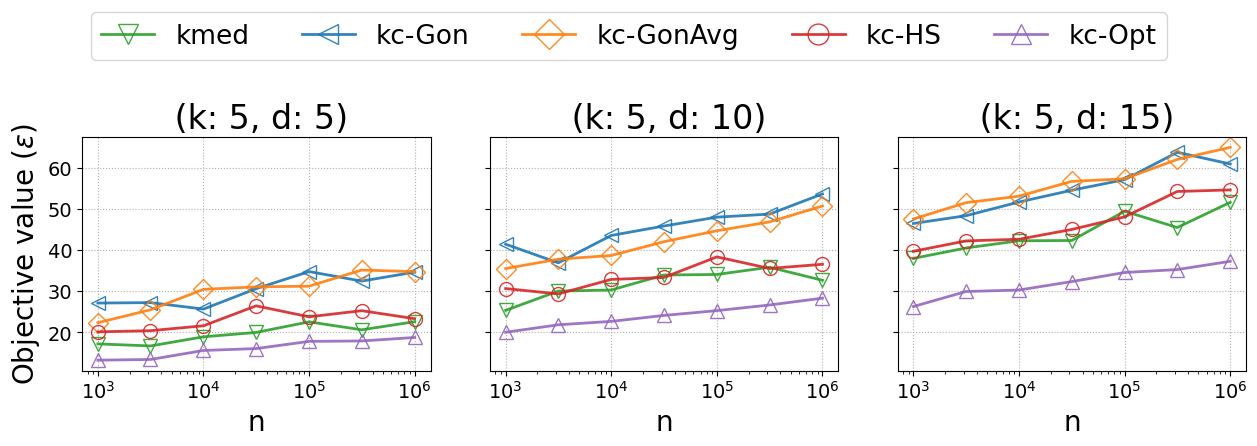

In [13]:

fig, ax = plt.subplots(1, 3, figsize = (13,4.7), sharey = True)

N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K_list = [5 ,5,5]
D_list = [5 , 10, 15,]# 10, 15 , 15] 

for i, K in enumerate(tqdm(K_list)):
    


    D = D_list[i]

    df_ARI, _,_, df_epsVal = extractData(K,D,N_list )

    print(df_epsVal)


    # omitted k-medians
    cols = ['kmed', 'kc-Gon', 'kc-GonAvg', 'kc-HS', 'kc-Opt']
    # cols = ['kc-Gon', 'kc-GonAvg', 'kc-HS', 'km', 'km++', 'Opt-Cg']
    

    for j, model in enumerate(cols):

        # df_ARI.plot(x = 'N', y = model, marker = markers[j], fillstyle = 'none', color=col[j], ax = ax[i], markersize = 10, alpha = 0.9, linewidth = 2,legend = False,)
        df_epsVal.plot(x = 'N', y = model, marker = markers[j], fillstyle = 'none', color=col[j], ax = ax[i], markersize = 10, alpha = 0.9, linewidth = 2,legend = False,)


    # ax[i].set_ylabel('ARI')
    # ax[i].set_ylabel('Eps Val')
    ax[i].set_ylabel('Objective value ('+r'$\varepsilon$'+')')


    ax[i].set_xlabel('n')

    ax[i].grid(True,linestyle = ':')
    ax[i].set_xscale("log")
    # ax[i].set_title('\n\nNorm (k: '+str(K)+', d: '+str(D)+')')
    ax[i].set_title('\n\n (k: '+str(K)+', d: '+str(D)+')')

    ax[i].tick_params(axis='both', which='major', labelsize=14)   
    ax[i].set_xticks([1000, 10000, 100000, 1000000])
    # ax[i].set_yticks([0.6,0.7, 0.8, 0.9, 1])


fig.tight_layout()


plt.subplots_adjust(wspace=0.17)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels , loc='upper center', mode = 'False', ncol=len(df_ARI.columns), fontsize = 19, markerscale = 1.5)
# fig.title('\n\n'9
plt.savefig(f'{RESULT_DIR}/aniso_supp.pdf', bbox_inches = 'tight')


plt.show()